___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. Nevertheless, we, the DA & DV instructors, recommend you study each part separately to create a source notebook for your further studies. 

# PART- 1 `( Data Cleaning )`

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [75]:
df0 = pd.read_json("scout_car.json", lines=True)
# lines = True --> Provides to read.json file line by line.

In [76]:
df = df0.copy()
df.head(3)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,...,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,...,"[\n, Sicherheit:, , Deaktivierung für Beifahrer-Airbag, , ESC mit elektronischer Quersperre, , Tagfahrlicht, , Reifendruck-Kontrollanzeige, , Kopfairbag-System mit Seiten-Airbags vorn, , Sicherheitslenksäule, Assistenzsysteme:, , Berganfahrassistent, Komfort:, , Scheinwerferreinigung, , Xenon plus inklusive Scheinwerfer-Reinigungsanlage, , Scheinwerfer-Reinigungsanlage, , Einparkhilfe hinten, , Licht-/Regensensor, , Funkfernbedienung, , Elektrische Luftzusatzheizung, Interieur:, , Rücksitzanlage 2 + 1, , Multifunktions-Sportlederlenkrad im 3-Speichen-Design, , automatische Leuchtweitenregulierung, , Fahrerinformationssystem, , Staub- und Pollenfilter, , Kopfstützen hinten (3 Stück), , Stoff Zeitgeist, , Fahrersitz manuell höheneinstellbar, , Scheiben seitlich und hinten in Wärmeschutzverglasung, , Kindersitzbefestigung ISOFIX und Top Tether für die äußeren Fondsitze, , Dachhimmel in Stoff titangrau, , Waschwasser-Standanzeige, , Nichtraucherfahrzeug, Exterieur:, , Elektrische Aussenspiegel, , Außenspiegel elektrisch beheizbar inklusive beheizbarer Scheibenwaschdüsen, , Scheibenwaschdüsen beheizbar vorn, , Aluminium-Gussräder im 10-Speichen-Design Größe 7 J x 16 mit Reifen 215/45 R 16, , LED-Heckleuchten, , Dynamikfahrwerk, , Reifenreparaturset, , Heckscheibenwischer mit Wasch-Wisch-Automatik, Umwelt:, , Start-Stop-System, , Abgaskonzept EU6 plus, Multimedia:, , Radio mit Dreifachtuner und Phasendiversity, , Bluetooth-Schnittstelle, , media-Paket, , Sprachdialogsystem, , MMI® Navigation plus, Getriebe:, , 7-Gang-Automatikgetriebe, Sonstiges:, , Scheckheft gepflegt, , Frontscheibe mit grauem Colorstreifen am oberen Rand, ...]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-8-tfsi-sport-gasoline-red-b2547f8a-e83f-6237-e053-e250040a56df,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,...,"[\nLangstreckenfahrzeug daher die hohe Kilometerleistung. , Bremsen neu bei 62000 km. , Gut gepflegter A1\n]",[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sportback-1-6-tdi-s-tronic-einparkhilfe-plus-music-diesel-black-6183cb6a-8570-4b86-a132-9b54214bca88,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+music,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,...,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 24.640 EUR, , Komfort, , Klimaanlage, , Elektrische Fensterheber, , Sitzheizung, , Tempomat, , Zentralverriegelung, , Leder-Lenkrad, , Elektrische Spiegel, , Wärmedämmendes Glas, , Anfahrassistent, , Sicherheit, , Window/Kopfairbags, , ESP (el. Stabilitäts Programm), , Elektronische Wegfahrsperre, , Reifendruckkontrolle, , Tagfahrlicht, , Exterieur, , Alufelgen 16 Zoll, , Einparkhilfe vo + hi, , Interieur, , Stoff Zeitgeist, , Interieurfarbe Schwarz, , Isofix-System, , Mittelarmlehne, , 4 Sitzplätze, , Media, , MMI® Navigation, , AUX-In Anschluss, , Radio mit MP3-Option, , Audi music interface, , Schaltung, , Automatikgetriebe, , Technik, , ABS, , Traktionskontrolle, , Servo-Lenkung, , Fahrer-Info-System, , Sprachbedienung, , Schadstoffklasse EURO 6, , Multifunktionslenkrad, , Partikelfilter, , Umweltplakette grün, , Motor-Start-Stopp-Funktion, , Allgemein, , Garantie, , Sonstiges, , Aus erster Hand, , Leasing-Fzg, ...]",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df.shape
# Looking how many rows and columns has dataset.

(15919, 54)

In [78]:
df.head().T
# Checking the all columns and their names. First looking at the dataset if it is imported correctly etc.

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,https://www.autoscout24.com//offers/audi-a1-1-8-tfsi-sport-gasoline-red-b2547f8a-e83f-6237-e053-e250040a56df,https://www.autoscout24.com//offers/audi-a1-sportback-1-6-tdi-s-tronic-einparkhilfe-plus-music-diesel-black-6183cb6a-8570-4b86-a132-9b54214bca88,https://www.autoscout24.com//offers/audi-a1-1-4-tdi-design-s-tronic-diesel-brown-35c86585-2727-d61e-e053-e250040ad640,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-s-line-ext-admired-xe-diesel-black-b86b55d8-9c7c-4a58-b658-b97008a51efc
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+music,1.4 TDi Design S tronic,"Sportback 1.4 TDI S-Tronic S-Line Ext. admired, Xe"
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
...,...,...,...,...,...
Last Service Date,NaN,NaN,NaN,NaN,NaN
Other Fuel Types,NaN,NaN,NaN,NaN,NaN
Availability,NaN,NaN,NaN,NaN,NaN
Last Timing Belt Service Date,NaN,NaN,NaN,NaN,NaN


The names of the columns are not in the same format. There are unwanted characters (\n) in some column names, it can be fixed.

In [79]:
df.rename(columns={'Previous Owners': 'previous_owners',
                   'Next Inspection': 'next_inspection',
                   'Inspection new': 'inspection_new',
                   'Warranty': 'warranty',
                   'Full Service': 'full_service',
                   'Non-smoking Vehicle': 'non_smoking_vehicle',
                   'Make': 'make',
                   'Model': 'model',
                   'Offer Number': 'offer_number',
                   'First Registration': 'first_registration',
                   'Body Color': 'body_color',
                   'Paint Type': 'paint_type',
                   'Body Color Original': 'body_color_original',
                   'Upholstery': 'upholstery',
                   'Body': 'body',
                   'Nr. of Doors': 'num_of_doors',
                   'Nr. of Seats': 'num_of_seats',
                   'Model Code': 'model_code',
                   'Gearing Type': 'gearing_type',
                   'Displacement': 'displacement',
                   'Cylinders': 'cylinders',
                   'Weight': 'weight',
                   'Drive chain': 'drive_chain',
                   'Fuel': 'fuel',
                   'Consumption': 'consumption',
                   'CO2 Emission': 'co2_emission',
                   'Emission Class': 'emission_class',
                   '\nComfort & Convenience\n': 'comfort_convenience',
                   '\nEntertainment & Media\n': 'entertainment_media',
                   '\nExtras\n': 'extras',
                   '\nSafety & Security\n': 'safety_security',
                   'Emission Label': 'emission_label',
                   'Gears': 'gears',
                   'Country version': 'country_version',
                   'Electricity consumption': 'electricity_consumption',
                   'Last Service Date': 'last_service_date',
                   'Other Fuel Types': 'other_fuel_types',
                   'Availability': 'availability',
                   'Last Timing Belt Service Date': 'last_timing_belt_service_date',
                   'Available from': 'available_from',
                   },
          inplace=True)


In [80]:
df.info()
# Checking dataset's general info --> dtypes of the columns, NaN values..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  previous_owners                9279 non-null  

In [81]:
df.isnull().sum()
# Looking at how many null values in which column

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
previous_owners                   6640
next_inspection                  12384
inspection_new                   11987
warranty                          5420
full_service                      7704
non_smoking_vehicle               8742
null                                 0
make                                 0
model                                0
offer_number                      3175
first_registration                1597
body_color                         597
paint_type                        5772
body_color_original      

In [82]:
df.isnull().sum()/df.shape[0]*100
# the percentage of null values of each columns


url                                0.000000
make_model                         0.000000
short_description                  0.288963
body_type                          0.376908
price                              0.000000
vat                               28.349771
km                                 0.000000
registration                       0.000000
prev_owner                        42.892141
kW                               100.000000
hp                                 0.000000
Type                               0.012564
previous_owners                   41.711163
next_inspection                   77.793831
inspection_new                    75.299956
warranty                          34.047365
full_service                      48.395000
non_smoking_vehicle               54.915510
null                               0.000000
make                               0.000000
model                              0.000000
offer_number                      19.944720
first_registration              

In [83]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_per = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

missing_df = pd.concat({"missing_count": missing_count,
                       "missing_percentage": missing_per}, axis=1)
missing_df


,missing_count,missing_percentage
kW,15919,100.000000
last_timing_belt_service_date,15903,99.899491
electricity_consumption,15782,99.139393
available_from,15647,98.291350
last_service_date,15353,96.444500
...,...,...
hp,0,0.000000
registration,0,0.000000
km,0,0.000000
price,0,0.000000


Some columns have too many missing values, electricity_consumption, last_service_date, other_fuel_types, availability, last_timing_belt_service_date, available_from. Also kw column consists of only missing values.

In [84]:
df.describe()

,price,kW
count,15919.000000,0.0
mean,18019.896727,NaN
std,7386.169409,NaN
min,13.000000,NaN
25%,12850.000000,NaN
50%,16900.000000,NaN
75%,21900.000000,NaN
max,74600.000000,NaN


Since only the price and kw column consists of integer and float data types, only two columns are correlated in statistical calculations.

Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values:

In [85]:
df.describe(include=[object]).T

,count,unique,top,freq
url,15919,15919,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,1
make_model,15919,9,Audi A3,3097
short_description,15873,10001,SPB 1.6 TDI 116 CV S tronic Sport,64
body_type,15859,9,Sedans,7903
vat,11406,2,VAT deductible,10980
...,...,...,...,...
last_service_date,566,266,"[\n02/2019\n, \nEuro 6\n]",23
other_fuel_types,880,1,"[[], [], []]",880
availability,635,15,\nin 90 days from ordering\n,196
last_timing_belt_service_date,16,15,[\n04/2016\n],2


The number of uniques is important, especially during visualization with hue.

In [86]:
object_col = df.select_dtypes(include='object')
object_col.T
# I have assigned the Features of object data type as "object_col"

,0,1,2,3,4,5,6,7,8,9,...,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
url,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,https://www.autoscout24.com//offers/audi-a1-1-8-tfsi-sport-gasoline-red-b2547f8a-e83f-6237-e053-e250040a56df,https://www.autoscout24.com//offers/audi-a1-sportback-1-6-tdi-s-tronic-einparkhilfe-plus-music-diesel-black-6183cb6a-8570-4b86-a132-9b54214bca88,https://www.autoscout24.com//offers/audi-a1-1-4-tdi-design-s-tronic-diesel-brown-35c86585-2727-d61e-e053-e250040ad640,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-s-line-ext-admired-xe-diesel-black-b86b55d8-9c7c-4a58-b658-b97008a51efc,https://www.autoscout24.com//offers/audi-a1-1-6-tdi-sport-dsg-shz-xenon-navi-bose-pdc-diesel-white-9784453b-91e6-4777-b9c5-22efa9217931,https://www.autoscout24.com//offers/audi-a1-sportback-1-6-tdi-s-tronic-s-line-navi-xenon-diesel-white-7b75e258-dffd-4ce5-b8c5-0b2b34ae29ab,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-admired-s-tronic-diesel-red-12065aff-8a0a-43f5-b077-f5168217956f,https://www.autoscout24.com//offers/audi-a1-spb-1-6-tdi-s-tronic-metal-plus-xeno-diesel-grey-14526900-b5e7-4e5c-8a96-8126f8221be1,https://www.autoscout24.com//offers/audi-a1-sportback-tfsi-ultra-95-s-tronic-amb-gasoline-white-e2c49a42-6aaa-4039-9af1-7546a20c110e,...,https://www.autoscout24.com//offers/renault-espace-limited-blue-dci-200-edc-diesel-black-44aa029d-936d-466b-a631-e6b8ae9faa2b,https://www.autoscout24.com//offers/renault-espace-tce-225-edc-initiale-pdc-shz-bose-klima-gasoline-blue-6cf5dd81-5c06-4871-a0fc-5fdb8c87efa6,https://www.autoscout24.com//offers/renault-espace-elysee-energy-dci-160-edc-diesel-white-d888d486-2a7c-4742-95b2-da3bf8129a67,https://www.autoscout24.com//offers/renault-espace-blue-dci-200cv-edc-executive-4control-diesel-black-eb0f5d79-03b3-4525-b7ee-c9b576142820,https://www.autoscout24.com//offers/renault-espace-initiale-paris-tce-225-edc-gpf-acc-eu6-gasoline-white-5269a852-4e8c-4ff6-a228-34ff1b0655bc,https://www.autoscout24.com//offers/renault-espace-blue-dci-200cv-edc-executive-4control-diesel-grey-8de8076f-140e-410c-88ee-ba0312bea2e9,https://www.autoscout24.com//offers/renault-espace-tce-225-edc-gpf-lim-deluxe-pano-rfk-gasoline-grey-1114d233-a176-41aa-b324-299ba89998b4,https://www.autoscout24.com//offers/renault-espace-blue-dci-200-edc-initiale-paris-leder-led-navi-key-diesel-white-6256d1a3-ea68-4193-91de-b5b5ffa4631c,https://www.autoscout24.com//offers/renault-espace-blue-dci-200cv-edc-business-nuova-da-immatricola-diesel-grey-5b0251a1-bd88-475c-a039-7e499da85d9d,https://www.autoscout24.com//offers/renault-espace-initiale-paris-tce-225-edc-gpf-navi-shz-aux-gasoline-grey-0bd690d9-7e93-4cab-bc5a-9d5b63402481
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+music,1.4 TDi Design S tronic,"Sportback 1.4 TDI S-Tronic S-Line Ext. admired, Xe",1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*,Sportback 1.6 TDI S-TRONIC S-LINE*NAVI|XENON*,Sportback 1.4 TDI admired S tronic,SPB 1.6 TDI S-tronic Metal plus + Xeno,SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.,...,Limited Blue dCi 200 EDC,TCe 225 EDC INITIALE PDC SHZ BOSE KLIMA,ELYSEE ENERGY dCi 160 EDC,Blue dCi 200CV EDC Executive 4Control,INITIALE Paris TCe 225 EDC GPF ACC EU6,Blue dCi 200CV EDC Executive 4Control,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Blue dCi 200 EDC Initiale Paris Leder LED Navi Key,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRICOLA",INITIALE PARIS TCe 225 EDC GPF NAVI SHZ AUX
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,...,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
vat,VAT de

In [87]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)


url
----------------
https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/a

I used a 'for loop' to get the information of whether unacceptable values in the dataset 

Checking if the dataset has any Question Mark:

In [88]:
df[df.isin(['?'])].any()


url                              False
make_model                       False
short_description                False
body_type                        False
price                            False
vat                              False
km                               False
registration                     False
prev_owner                       False
kW                               False
hp                               False
Type                             False
previous_owners                  False
next_inspection                  False
inspection_new                   False
warranty                         False
full_service                     False
non_smoking_vehicle              False
null                             False
make                             False
model                            False
offer_number                     False
first_registration               False
body_color                       False
paint_type                       False
body_color_original      

In [89]:
df[df.isin(['?'])].any().sum()

0

# Univariate and Multivariate Analysis

### Examining all features (first target feature("price") then the others) separetly from different aspects according to target feature.

### price column: This column is our target feature.

In [90]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [91]:
df.price.isnull().sum() # looking if there is null values in our target feature.

0

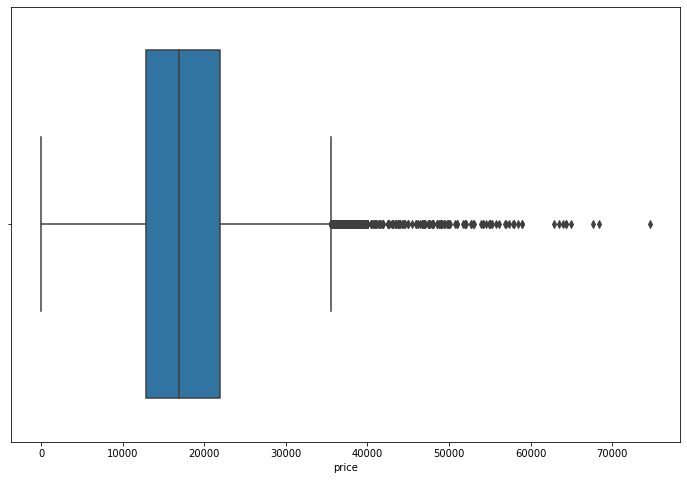

In [92]:
#checking the boxplot to see extreme values

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='price')
plt.show()

In [93]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

mean is a little bit bigger than median (50%), it means, it is a little bit right skewed. We can see that also with histplot.

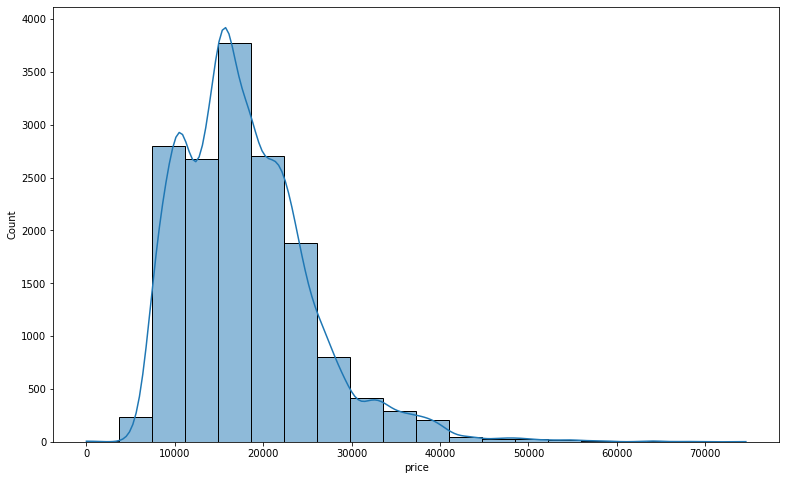

In [94]:
# Checking the histplot/kdeplot to see distribution of feature

plt.figure(figsize=(13, 8))
sns.histplot(data=df, x='price', bins=20, kde=True)
plt.show()

### url column:

In [95]:
df.url.value_counts()

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

Each line contains a different internet address. This column can be dropped because it has no significant relationship with the target feature, price.

In [96]:
df.drop("url", axis=1, inplace=True)

### make_model:

In [97]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

The most data belongs to the A3 model of the Audi brand.

In [98]:
df.make_model.describe()

count       15919
unique          9
top       Audi A3
freq         3097
Name: make_model, dtype: object

There is 9 unique values in this column.

In [99]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

In [100]:
df.make_model.nunique()

9

In [101]:
df.make_model.isnull().sum()

0

### model column:

In [102]:
df.model.value_counts(dropna=False)

[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: model, dtype: int64

Each line contains unwanted characters. We can get the information we want with the string function

In [103]:
df.model.str[1].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

It can be seen that model feature is exactly same with make_model feature. This column can be dropped.

In [104]:
df.drop('model', axis=1, inplace=True)

### make column:

In [105]:
df.make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: make, dtype: int64

In [106]:
df['make'] = df.make.str.strip('\n')
# i fixed the name of values by using string function

In [107]:
df.make.value_counts()

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

The make_model column gives more detailed information. This column can be dropped.

In [108]:
df.drop('make', axis=1, inplace=True)

### short_description column:

In [109]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
None                                              46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

A column with too many different values, it can be dropped.

In [110]:
df.short_description.describe()

count                                 15873
unique                                10001
top       SPB 1.6 TDI 116 CV S tronic Sport
freq                                     64
Name: short_description, dtype: object

In [111]:
df.drop('short_description', axis=1, inplace=True)


### body_type column:

In [112]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
None               60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [113]:
df.body_type.describe()

count      15859
unique         9
top       Sedans
freq        7903
Name: body_type, dtype: object

In [114]:
df.body_type.isnull().sum()


60

In [115]:
df.body_type.isnull().sum()/df.shape[0]*100

0.37690809724228913

### body column:

In [116]:
df.body.value_counts(dropna=False)


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: body, dtype: int64

In [117]:
df.body.str[1].value_counts()


Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body, dtype: int64

This column is same with the body_type column. It can be dropped.

In [118]:
df.drop('body', axis=1, inplace=True)

### vat column: vat means The Value Added Tax

In [119]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
None                 4513
Price negotiable      426
Name: vat, dtype: int64

In [120]:
df.vat.isnull().sum()/df.shape[0]*100


28.349770714240847

### km column:

In [121]:
df.km.value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

This column has string values

In [122]:
df.km.value_counts(dropna=False).sort_index().tail(10)


99,875 km     1
99,900 km     1
99,950 km    11
99,980 km     1
99,990 km     3
99,999 km     1
990 km        2
991 km        1
995 km        1
999 km        3
Name: km, dtype: int64

In [123]:
df['km'] = df.km.str.replace(',','').str.extract('(\d{1,8})')
# to remove comma, i applied string.replace function

In [124]:
df.km.astype('float')

0        56013.0
1        80000.0
2        83450.0
3        73000.0
4        16200.0
          ...   
15914        NaN
15915     9900.0
15916       15.0
15917       10.0
15918        NaN
Name: km, Length: 15919, dtype: float64

In [125]:
df['km'] = df.km.astype('float')


In [126]:
df.km.value_counts(dropna=False)

10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6690, dtype: int64

In [127]:
df.km.isnull().sum()/df.shape[0]*100

6.432564859601733

### registration column:

In [128]:
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

### There is also a column that named first_registration. I am checking whether they are same or not:

In [129]:
df.first_registration.value_counts(dropna=False)

[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: first_registration, dtype: int64

In [130]:
df.first_registration.str[1].value_counts(dropna=False)


2018    4522
2016    3674
2017    3273
2019    2853
NaN     1597
Name: first_registration, dtype: int64

In [131]:
df['first_registration'] = df.first_registration.str[1]

In [132]:
df.first_registration.value_counts(dropna=False)

2018    4522
2016    3674
2017    3273
2019    2853
NaN     1597
Name: first_registration, dtype: int64

In [133]:
df[['registration', 'first_registration']].value_counts(dropna=False)

registration  first_registration
-/-           NaN                   1597
03/2018       2018                   695
02/2019       2019                   585
05/2018       2018                   572
03/2019       2019                   543
01/2019       2019                   541
04/2018       2018                   541
02/2018       2018                   539
03/2016       2016                   536
06/2018       2018                   532
04/2016       2016                   532
01/2018       2018                   511
04/2019       2019                   506
02/2016       2016                   472
03/2017       2017                   471
05/2016       2016                   459
06/2016       2016                   452
05/2019       2019                   440
06/2017       2017                   409
05/2017       2017                   404
07/2018       2018                   396
04/2017       2017                   380
01/2016       2016                   376
02/2017       2017      

There is no data after 2019, I have to calculate the age of the cars according to 2019. But first i should change the data type of column. It is originally 'object' data type.

In [134]:
df['first_registration'] = df.first_registration.astype('float')
df.first_registration

0        2016.0
1        2017.0
2        2016.0
3        2016.0
4        2016.0
          ...  
15914       NaN
15915    2019.0
15916    2019.0
15917    2019.0
15918    2019.0
Name: first_registration, Length: 15919, dtype: float64

In [135]:
df ['age'] = 2019 - df.first_registration

In [136]:
df.age

0        3.0
1        2.0
2        3.0
3        3.0
4        3.0
        ... 
15914    NaN
15915    0.0
15916    0.0
15917    0.0
15918    0.0
Name: age, Length: 15919, dtype: float64

In [137]:
df.age.value_counts(dropna=False)

1.0    4522
3.0    3674
2.0    3273
0.0    2853
NaN    1597
Name: age, dtype: int64

I do not need the registration and first_registration columns any more, they can be dropped.

In [138]:
df.drop(['registration', 'first_registration'], axis=1, inplace=True)

### prev_owner column:

In [139]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [140]:
df.prev_owner.isnull().sum()/df.shape[0]*100

42.892141466172504

### There is also a column that named previous_owners. I am checking whether they are same or not:

In [141]:
df.previous_owners.value_counts(dropna=False)

\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n2\n, \n137 g CO2/

In [142]:
# i want the first values of lists, so:
df['previous_owners'] = [item[0] if type(
    item) == list else item for item in df["previous_owners"]]


In [143]:
df.previous_owners


0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: previous_owners, Length: 15919, dtype: object

In [144]:
# to remove \n from the values, str.string function can be used:
df.previous_owners.str.strip('\n')

0          2
1        NaN
2          1
3          1
4          1
        ... 
15914    NaN
15915      1
15916      1
15917    NaN
15918      1
Name: previous_owners, Length: 15919, dtype: object

In [145]:
df['previous_owners'] = df.previous_owners.str.strip('\n').astype('float')
# I'm converting the column's data type to float, this can help me in the analysis process

In [146]:
df.previous_owners.isnull().sum()/df.shape[0]*100

41.71116276147999

In [147]:
df.previous_owners.value_counts(dropna=False)


1.0    8294
NaN    6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: previous_owners, dtype: int64

In [148]:
df[['prev_owner', 'previous_owners']].value_counts(dropna=False)


prev_owner         previous_owners
1 previous owner   1.0                8294
NaN                NaN                6640
2 previous owners  2.0                 778
NaN                0.0                 188
3 previous owners  3.0                  17
4 previous owners  4.0                   2
dtype: int64

In [149]:
df[['prev_owner', 'previous_owners']].isnull().sum()

prev_owner         6828
previous_owners    6640
dtype: int64

prev_owner and previous_owners columns look same but previous_owners has less NaN value. It is logical to use previous_owners column.

In [150]:
df.drop('prev_owner', axis=1, inplace=True)

### kW column:

In [151]:
df.kW.value_counts()

Series([], Name: kW, dtype: int64)

In [152]:
df.kW.isnull().sum()

15919

kW column consists of only null values, it can be dropped.

In [153]:
df.drop('kW', axis=1, inplace=True)

### hp column:

In [154]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
84 kW        1
195 kW       1
44 kW        1
239 kW       1
9 kW         1
Name: hp, Length: 81, dtype: int64

Let's move the 'kw' string value inside the column to the column name, leaving only numeric data in the column

In [155]:
df['hp_kw'] = df.hp.str.extract('(\d{1,4})')[0].astype('float')


In [156]:
df.hp_kw.value_counts(dropna=True)

85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
         ... 
137.0       1
9.0         1
44.0        1
133.0       1
239.0       1
Name: hp_kw, Length: 80, dtype: int64

In [157]:
df.drop('hp', axis=1, inplace=True)

### type column:

In [158]:
df.Type.value_counts(dropna=False)

[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, New, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95]       1
[, Used, , Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)]                               1


There are many information in this column but i use only second values: Used, New, etc.

In [159]:
df.Type.str[1]

0                  Used
1                  Used
2                  Used
3                  Used
4                  Used
              ...      
15914               New
15915              Used
15916    Pre-registered
15917    Pre-registered
15918     Demonstration
Name: Type, Length: 15919, dtype: object

In [160]:
df['type'] = df.Type.str[1]
df.type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [161]:
df.drop('Type', axis=1, inplace=True)

In [162]:
df.type.isnull().sum()/df.shape[0]*100

0.012563603241409635

### next_inspection column:

In [163]:
df.next_inspection.value_counts(dropna=False)

NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n12/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2022\n, \n1 (No sticker)\n]             1
[\n05/2021\n, \n93 g CO2/km (comb)\n]         1
[\n06/2021\n, \n93 g CO2/km (comb)\n]         1
[\n01/2022\n, \n168 g CO2/km (comb)\n]        1
Name: next_inspection, Length: 1400, dtype: int64

In [164]:
df['next_inspection'] = [item[0] if type(item) == list else item for item in df['next_inspection']]

In [165]:
df['next_inspection'] = df.next_inspection.str.strip('\n')


In [166]:
df.next_inspection.isnull().sum()/df.shape[0]*100

77.79383127080847

In [167]:
df.next_inspection.value_counts(dropna=False)

NaN        12384
06/2021      471
03/2021      210
05/2021      180
04/2021      171
           ...  
05/2014        1
04/2016        1
01/1955        1
01/2018        1
11/2022        1
Name: next_inspection, Length: 78, dtype: int64

This column's name is next_inspection but it contains outdated data. I am dropping it.

or can use it to fill inpection_new column

In [168]:
#df.drop('next_inspection', axis=1, inplace=True)


### inspection_new column:

In [169]:
df.inspection_new.value_counts(dropna=False)

NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]            1
[\nYes\n, \n, 6.8 l/100 km (comb), \n, 8.5 l/100 km (city), \n, 6.1 l/100 km (country), \n]        1
[\nYes\n, \n, 4.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]        1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.8 l/100 km (city), \n, 4.3 l/100 km (country), \n]

In [170]:
df.inspection_new.isnull().sum()/df.shape[0]*100

75.29995602738866

In [171]:
df['inspection_new'] = [item[0] if type(
    item) == list else item for item in df['inspection_new']]


In [172]:
df['inspection_new'] = df.inspection_new.str.strip('\n')
df.inspection_new.value_counts(dropna=False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

There is a high number of NaN values. Some people did not want to give this information.

### warranty column:

In [173]:
df.warranty.value_counts(dropna=False)

NaN                                                                                                5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
                                                                                                   ... 
[\n72 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n60 months\n, \n14 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n121 g CO2/km (comb)\n]                                                              1
[\n12 months\n, \nEuro 6d\n]                                    

In [174]:
df['warranty'] = [item[0] if type(item) == list else item for item in df.warranty]

In [175]:
df['warranty_months']=df.warranty.str.strip('\n').str.extract('(\d{1,10})')


In [176]:
df.drop('warranty', axis=1, inplace=True)

In [177]:

df.warranty_months.value_counts(dropna=False)


NaN    11066
12      2594
24      1118
60       401
36       279
48       149
6        125
72        59
3         33
23        11
18        10
20         7
25         6
2          5
50         4
26         4
16         4
4          3
1          3
19         3
34         3
13         3
28         2
22         2
14         2
11         2
46         2
21         2
9          2
17         2
45         2
33         1
40         1
65         1
10         1
15         1
7          1
8          1
56         1
49         1
47         1
30         1
Name: warranty_months, dtype: int64

### full_service column:

In [178]:
df.full_service.value_counts(dropna=False)

NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n80 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n84 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]           1
[\n, \n, \n, 4.9 l/100 km (comb), \n, 6.2 l/100 km (city), \n, 4.1 l/100 km (country), \n]       1
[\n, \n, \

I think, i do not need it.

In [179]:
df.drop('full_service', axis=1, inplace=True)


### non_smoking_vehicle column:

In [180]:
df.non_smoking_vehicle.value_counts(dropna=False)

NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
                                                                                              ... 
[\n, \n, \n, 5.6 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.7 l/100 km (country), \n]       1
[\n, \n, \n122 g CO2/km (comb)\n]                                                                1
[\n, \n, \n158 g CO2/km (comb)\n]                                                                1
[\n, \n, \n150 g CO2/km (comb)\n]                                                                1
[\n, \n, \

This column also looks like the full_service column, although not exactly the same. I am dropping this column too.

In [181]:
df.drop('non_smoking_vehicle', axis=1, inplace=True)


### null column!!!:

In [182]:
df.null.value_counts(dropna=False)

[]    15919
Name: null, dtype: int64

I consists of only null values, i am dropping it.

In [183]:
df.drop('null', axis=1, inplace=True)

### offer_number column:

In [184]:
df.offer_number.value_counts(dropna=False)

NaN                                               3175
[\nLT67679\n]                                       27
[\nUN89904\n]                                       27
[\nXJ38068\n]                                       27
[\nJV03654\n]                                       27
                                                  ... 
[\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n]       1
[\n6701576\n]                                        1
[\n6701569\n]                                        1
[\n158121\n]                                         1
[\nRe_30000008029\n]                                 1
Name: offer_number, Length: 11441, dtype: int64

In [185]:
df['offer_number'] = [item[0] if type(item) == list else item for item in df.offer_number]

In [186]:
df['offer_number'] = df.offer_number.str.strip('\n')


In [187]:
df.offer_number.value_counts(dropna=False)

NaN                                         3175
LT67679                                       27
UN89904                                       27
XJ38068                                       27
JV03654                                       27
                                            ... 
160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b       1
6701576                                        1
6701569                                        1
158121                                         1
Re_30000008029                                 1
Name: offer_number, Length: 11441, dtype: int64

They are only offer number for each advert, it can not be so important to our target feature. I think i do not need this column.

In [188]:
df.drop('offer_number', axis=1, inplace=True)

### body_color column:

In [189]:
df.body_color.value_counts(dropna=False)

[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: body_color, dtype: int64

In [190]:
df['body_color'] = [item[1] if type(
    item) == list else item for item in df['body_color']]


In [191]:
df.body_color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

Does the color of the cars affect the selling price? it can be examined.

In [192]:
df.body_color.isnull().sum()/df.shape[0]*100

3.7502355675607766

there is also a column that named body_color_original

In [193]:
df.body_color_original.value_counts(dropna=False)

NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nRouge-Braun (G0Y)\n]                   1
[\nVARI COLRI DISPONIBILI\n]              1
[\nKokosnussbraun Metallic\n]             1
[\nFarbe frei wählbar\n]                  1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: body_color_original, Length: 1928, dtype: int64

In [194]:
df['body_color_original'] = [item[0] if type(
    item) == list else item for item in df['body_color_original']]


In [195]:
df['body_color_original'] = df.body_color_original.str.strip('\n')


In [196]:
df.body_color_original.value_counts(dropna=False)

NaN                              3759
Onyx Schwarz                      338
Bianco                            282
Mythosschwarz Metallic            238
Brillantschwarz                   216
                                 ... 
Rouge-Braun (G0Y)                   1
VARI COLRI DISPONIBILI              1
Kokosnussbraun Metallic             1
Farbe frei wählbar                  1
Perlmutt-Weiß Metallic (Weiß)       1
Name: body_color_original, Length: 1928, dtype: int64

There are so many different variables in this column, it can be dropped

In [197]:
df.drop('body_color_original', axis=1, inplace=True)


In [198]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'next_inspection', 'inspection_new', 'body_color', 'paint_type',
       'upholstery', 'num_of_doors', 'num_of_seats', 'model_code',
       'gearing_type', 'displacement', 'cylinders', 'weight', 'drive_chain',
       'fuel', 'consumption', 'co2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'description', 'emission_label', 'gears',
       'country_version', 'electricity_consumption', 'last_service_date',
       'other_fuel_types', 'availability', 'last_timing_belt_service_date',
       'available_from', 'age', 'hp_kw', 'type', 'warranty_months'],
      dtype='object')

### paint_type column:

In [199]:
df.paint_type.value_counts(dropna=False)

[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: paint_type, dtype: int64

In [200]:
df['paint_type'] = [item[0] if type(item) == list else item for item in df.paint_type]

In [201]:
df['paint_type'] = df.paint_type.str.strip('\n')


In [202]:
df.paint_type.value_counts(dropna=False)


Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [203]:
df.paint_type.isnull().sum()/df.shape[0]*100

36.25855895470821

### upholstery column:

In [204]:
df.upholstery.value_counts(dropna=False)

[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nVelour, Gre

In [205]:
# I can see that some variables repeat. I can rearrange this column:

In [206]:
df['upholstery'] = df["upholstery"].apply(lambda x: x[0] if type(x) == list else x)

In [207]:
df['upholstery'] = df.upholstery.str.strip("\n").str.split(", ")

In [208]:
df['upholstery'].value_counts(dropna=False)

[Cloth, Black]           5821
NaN                      3720
[Part leather, Black]    1121
[Cloth]                  1005
[Cloth, Grey]             891
[Cloth, Other]            639
[Full leather, Black]     575
[Black]                   491
[Grey]                    273
[Other, Other]            182
[Part leather]            140
[Full leather]            139
[Full leather, Brown]     116
[Part leather, Grey]      116
[Other, Black]            110
[Full leather, Other]      72
[Full leather, Grey]       67
[Part leather, Other]      65
[Other]                    56
[Part leather, Brown]      50
[alcantara, Black]         47
[Velour, Black]            36
[Full leather, Beige]      36
[Cloth, Brown]             28
[Velour]                   16
[Other, Grey]              15
[Cloth, Beige]             13
[Brown]                    12
[Cloth, Blue]              12
[Velour, Grey]              8
[Cloth, White]              8
[alcantara, Grey]           6
[Cloth, Red]                5
[Other, Ye

In [209]:
uph_type = ['Cloth', 'Part leather', 'Full leather', 'alcantara', 'Velour']
df["upholstery_type"] = df["upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in uph_type else np.nan)

In [210]:
df['upholstery_type'].value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: upholstery_type, dtype: int64

In [211]:
color_list = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def uph_color(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and  len(x) == 1 and x[0] in color_list:
        return x[0]
    else:
        return np.nan
    
df['upholstery_color'] = df.upholstery.apply(uph_color)

In [212]:
df.upholstery_color.value_counts(dropna=False)

Black     8201
NaN       5078
Grey      1376
Other      960
Brown      207
Beige       54
Blue        16
White       13
Red          9
Yellow       4
Orange       1
Name: upholstery_color, dtype: int64

In [213]:
df.drop('upholstery', axis=1, inplace=True)

### num_of_doors column:

In [214]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'next_inspection', 'inspection_new', 'body_color', 'paint_type',
       'num_of_doors', 'num_of_seats', 'model_code', 'gearing_type',
       'displacement', 'cylinders', 'weight', 'drive_chain', 'fuel',
       'consumption', 'co2_emission', 'emission_class', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'description',
       'emission_label', 'gears', 'country_version', 'electricity_consumption',
       'last_service_date', 'other_fuel_types', 'availability',
       'last_timing_belt_service_date', 'available_from', 'age', 'hp_kw',
       'type', 'warranty_months', 'upholstery_type', 'upholstery_color'],
      dtype='object')

In [215]:
df.num_of_doors.value_counts(dropna=False)

[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: num_of_doors, dtype: int64

In [216]:
df['num_of_doors'] = [item[0] if type(item) == list else item for item in df.num_of_doors]

In [217]:
df['num_of_doors'] = df.num_of_doors.str.strip('\n').astype('float')


In [218]:
df.num_of_doors.value_counts(dropna=False)


5.0    11575
4.0     3079
3.0      832
2.0      219
NaN      212
1.0        1
7.0        1
Name: num_of_doors, dtype: int64

### num_of_seats column:

In [219]:
df.num_of_seats.value_counts(dropna=False)


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: num_of_seats, dtype: int64

In [220]:
df['num_of_seats'] = df.num_of_seats.str[0].str.strip('\n').astype('float')

In [221]:
df.num_of_seats.value_counts(dropna=False)


5.0    13336
4.0     1125
NaN      977
7.0      362
2.0      116
6.0        2
3.0        1
Name: num_of_seats, dtype: int64

### model_code column:

In [222]:
df.model_code.value_counts(dropna=False)

NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/AVN\n]        1
[\n0035/BEM\n]        1
[\n0035/BAG\n]        1
[\n0035/BAA\n]        1
[\n3333/BKG\n]        1
Name: model_code, Length: 233, dtype: int64

In [223]:
df['model_code'] = df.model_code.str[0].str.strip('\n')

In [224]:
df.model_code.value_counts(dropna=False)

NaN         10941
0035/BCB      268
0588/BNO      245
0588/BDB      206
0588/BHX      188
            ...  
0035/AVN        1
0035/BEM        1
0035/BAG        1
0035/BAA        1
3333/BKG        1
Name: model_code, Length: 233, dtype: int64

Can this column be useful? I couldn't make a relation with the price, i can drop it.

In [225]:
df.drop('model_code', axis=1, inplace=True)

### gearing_type column:

In [226]:
df.gearing_type.value_counts(dropna=False)

[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: gearing_type, dtype: int64

In [227]:
df['gearing_type'] = [item[1] if type(item) == list else item for item in df.gearing_type]

In [228]:
df.gearing_type.value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

### There is also gears column, can they be same?

In [229]:
df.gears.value_counts(dropna=False)

[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: gears, dtype: int64

In [230]:
df.gears

0            NaN
1        [\n7\n]
2            NaN
3        [\n6\n]
4            NaN
          ...   
15914    [\n6\n]
15915    [\n7\n]
15916    [\n6\n]
15917    [\n6\n]
15918        NaN
Name: gears, Length: 15919, dtype: object

In [231]:
df['gears'] = df.gears.str[0].str.strip('\n')

In [232]:
df.gears.value_counts(dropna=False)


6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: gears, dtype: int64

df.gears and df.gearing_type are two different columns.

### displacement column:

Engine displacement is a determining factor in the horsepower and torque that an engine produces, as well as how much fuel that engine consumes. Generally speaking, the higher an engine’s displacement the more power it can create, while the lower the displacement the less fuel it can consume. This is because displacement has a direct impact on how much fuel must be drawn into a cylinder to create power and maintain engine operation. A high-displacement engine draws in more of the air/fuel mixture per revolution; therefore more fuel is consumed. 

In some countries vehicles are taxed based on engine displacement. This is not the case in the United States, however generally speaking higher-displacement engines are more costly, as they are more resource and labor intensive to design and manufacture.

https://www.yourmechanic.com/article/what-is-engine-displacement#:~:text=Engine%20displacement%20is%20the%20combined,)%2C%20and%20number%20of%20cylinders.

In [233]:
df.displacement.value_counts(dropna=False)

[\n1,598 cc\n]    4761
[\n999 cc\n]      2438
[\n1,398 cc\n]    1314
[\n1,399 cc\n]     749
[\n1,229 cc\n]     677
                  ... 
[\n122 cc\n]         1
[\n1,198 cc\n]       1
[\n1,195 cc\n]       1
[\n2,967 cc\n]       1
[\n1,800 cc\n]       1
Name: displacement, Length: 78, dtype: int64

In [234]:
df.displacement.str[0].str.strip('\n')


0        1,422 cc
1        1,798 cc
2        1,598 cc
3        1,422 cc
4        1,422 cc
           ...   
15914    1,997 cc
15915    1,798 cc
15916    1,997 cc
15917    1,997 cc
15918    1,798 cc
Name: displacement, Length: 15919, dtype: object

In [235]:
df['displacement_cc'] = df.displacement.str[0].str.replace(',', '').str.strip('\n').str.strip('cc')


In [236]:
df.displacement_cc.value_counts(dropna=False)


1598     4761
999      2438
1398     1314
1399      749
1229      677
         ... 
122         1
1198        1
1195        1
2967        1
1800        1
Name: displacement_cc, Length: 78, dtype: int64

In [237]:
df.displacement_cc

0        1422 
1        1798 
2        1598 
3        1422 
4        1422 
         ...  
15914    1997 
15915    1798 
15916    1997 
15917    1997 
15918    1798 
Name: displacement_cc, Length: 15919, dtype: object

In [238]:
df.drop('displacement', axis=1, inplace=True)

In [239]:
df.columns


Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'next_inspection', 'inspection_new', 'body_color', 'paint_type',
       'num_of_doors', 'num_of_seats', 'gearing_type', 'cylinders', 'weight',
       'drive_chain', 'fuel', 'consumption', 'co2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'description', 'emission_label', 'gears',
       'country_version', 'electricity_consumption', 'last_service_date',
       'other_fuel_types', 'availability', 'last_timing_belt_service_date',
       'available_from', 'age', 'hp_kw', 'type', 'warranty_months',
       'upholstery_type', 'upholstery_color', 'displacement_cc'],
      dtype='object')

### cylinders column:

In [240]:
df.cylinders.value_counts(dropna=False)

[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: cylinders, dtype: int64

In [241]:
df['cylinders'] = df.cylinders.str[0].str.strip('\n')

In [242]:
df.cylinders.value_counts(dropna=False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: cylinders, dtype: int64

In [243]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'next_inspection', 'inspection_new', 'body_color', 'paint_type',
       'num_of_doors', 'num_of_seats', 'gearing_type', 'cylinders', 'weight',
       'drive_chain', 'fuel', 'consumption', 'co2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'description', 'emission_label', 'gears',
       'country_version', 'electricity_consumption', 'last_service_date',
       'other_fuel_types', 'availability', 'last_timing_belt_service_date',
       'available_from', 'age', 'hp_kw', 'type', 'warranty_months',
       'upholstery_type', 'upholstery_color', 'displacement_cc'],
      dtype='object')

### weight column:

In [244]:
df.weight.value_counts(dropna=True)

[\n1,163 kg\n]    574
[\n1,360 kg\n]    356
[\n1,165 kg\n]    301
[\n1,335 kg\n]    242
[\n1,135 kg\n]    213
                 ... 
[\n1,331 kg\n]      1
[\n1,132 kg\n]      1
[\n1,252 kg\n]      1
[\n1,792 kg\n]      1
[\n2,037 kg\n]      1
Name: weight, Length: 434, dtype: int64

In [245]:
df.weight.str[0]


0        \n1,220 kg\n
1        \n1,255 kg\n
2                 NaN
3        \n1,195 kg\n
4                 NaN
             ...     
15914    \n1,758 kg\n
15915    \n1,708 kg\n
15916             NaN
15917    \n1,758 kg\n
15918    \n1,685 kg\n
Name: weight, Length: 15919, dtype: object

In [246]:
df['weight_kg'] = df.weight.str[0].str.replace(',', '').str.strip('\n').str.strip('kg')


In [247]:
df.weight_kg.value_counts(dropna=True)


1163     574
1360     356
1165     301
1335     242
1135     213
        ... 
1331       1
1132       1
1252       1
1792       1
2037       1
Name: weight_kg, Length: 434, dtype: int64

weight and price, are they related? Does weight have an effect on price?

A vehicle’s weight is an important factor in how much fuel it will consume. The heavier the vehicle, the more energy it needs to get moving. Extra weight also increases a vehicle’s rolling resistance, which is a force that resists forward motion produced as the wheels roll over the road.

This means that reducing weight is a very effective way to lower a vehicle’s fuel consumption.
https://www.nrcan.gc.ca/energy-efficiency/transportation-alternative-fuels/personal-vehicles/choosing-right-vehicle/tips-buying-fuel-efficient-vehicle/factors-affect-fuel-efficiency/vehicle-weight/21024

In [248]:
df.drop('weight', axis=1, inplace=True)

In [249]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'next_inspection', 'inspection_new', 'body_color', 'paint_type',
       'num_of_doors', 'num_of_seats', 'gearing_type', 'cylinders',
       'drive_chain', 'fuel', 'consumption', 'co2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'description', 'emission_label', 'gears',
       'country_version', 'electricity_consumption', 'last_service_date',
       'other_fuel_types', 'availability', 'last_timing_belt_service_date',
       'available_from', 'age', 'hp_kw', 'type', 'warranty_months',
       'upholstery_type', 'upholstery_color', 'displacement_cc', 'weight_kg'],
      dtype='object')

### drive_chain column:

In [250]:
df.drive_chain.value_counts(dropna=False)

[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: drive_chain, dtype: int64

In [251]:
df['drive_chain'] = df.drive_chain.str[0].str.strip('\n')


In [252]:
df.drive_chain.value_counts(dropna=False)


front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

### fuel column:

In [253]:
df.fuel.value_counts(dropna=False)

[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
                                                                                                                       ... 
[\n, Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91, \n]                                                          1
[\n, Super Plus 98 / Super E10 95, \n]                                                                                    1
[\n, Reg

i need the first value of each row

In [254]:
df['fuel'] = df.fuel.str[1]

In [255]:
df.fuel

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: fuel, Length: 15919, dtype: object

In [256]:
df['fuel'] = df.fuel.str.split('/').str[0].str.strip()


In [257]:
df.fuel.value_counts(dropna=False)


Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: fuel, dtype: int64

I don't want the data in parentheses

In [258]:
df['fuel'] = df.fuel.str.split('(').str[0].str.strip()


In [259]:
df.fuel.value_counts(dropna=False)


Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: fuel, dtype: int64

it will be better if i group the data

In [260]:
benzine = ['Gasoline', 'Super 95', 'Regular', 'Super E10 95', 'Super E10 95 (Particulate Filter)', 'Super Plus 98', 'Super Plus E10 98', 'Others']
lpg = ['LPG', 'Liquid petroleum gas', 'CNG', 'Biogas', 'Domestic gas H']
def fueltype(x):
    if x in benzine:
        return 'Benzine'
    elif x in lpg:
        return 'LPG/CNG'
    else:
        return x

In [261]:
df['fuel'] = df.fuel.apply(fueltype)


In [262]:
df.fuel.value_counts(dropna=False)


Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: fuel, dtype: int64

In [263]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'next_inspection', 'inspection_new', 'body_color', 'paint_type',
       'num_of_doors', 'num_of_seats', 'gearing_type', 'cylinders',
       'drive_chain', 'fuel', 'consumption', 'co2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'description', 'emission_label', 'gears',
       'country_version', 'electricity_consumption', 'last_service_date',
       'other_fuel_types', 'availability', 'last_timing_belt_service_date',
       'available_from', 'age', 'hp_kw', 'type', 'warranty_months',
       'upholstery_type', 'upholstery_color', 'displacement_cc', 'weight_kg'],
      dtype='object')

### consumption column:

In [264]:
df.consumption.value_counts(dropna=False)

NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                 1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                 1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                    1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]         1

There are three different pieces of information in each row of this column. 
---> combination consumption
---> city consumption
---> country consumption

This column has in some rows nested lists.

In [265]:
pd.DataFrame(df.consumption)

,consumption
0,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]"
1,"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]"
2,"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)], [3.4 l/100 km (country)]]"
3,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]"
4,"[[4.1 l/100 km (comb)], [4.6 l/100 km (city)], [3.8 l/100 km (country)]]"
...,...
15914,"[[5.3 l/100 km (comb)], [6.2 l/100 km (city)], [4.7 l/100 km (country)]]"
15915,"[\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (city), \n, 6.3 l/100 km (country), \n]"
15916,"[[5.3 l/100 km (comb)], [6.2 l/100 km (city)], [4.7 l/100 km (country)]]"
15917,"[[5.3 l/100 km (comb)], [6.2 l/100 km (city)], [4.7 l/100 km (country)]]"


In [266]:
df.consumption.sample(10)

8009     [[4.6 l/100 km (comb)], [5.5 l/100 km (city)],...
11366    [[5.1 l/100 km (comb)], [6.1 l/100 km (city)],...
8944                                                   NaN
9427     [\n, 5.2 l/100 km (comb), \n, 6.6 l/100 km (ci...
9424     [\n, 5.2 l/100 km (comb), \n, 6.6 l/100 km (ci...
5593                                                   NaN
5141     [[3.9 l/100 km (comb)], [4.1 l/100 km (city)],...
7775     [[5.6 l/100 km (comb)], [7.3 l/100 km (city)],...
5997     [[7.1 l/100 km (comb)], [9.9 l/100 km (city)],...
10742    [[5 l/100 km (comb)], [6.5 l/100 km (city)], [...
Name: consumption, dtype: object

In [267]:
def parser1(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[0] != []:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]


def parser2(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[1] != []:
            return x[1][0]
        else:
            return np.nan
    elif x[3].endswith(')'):
        return x[3]
    else:
        return np.nan


def parser3(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[2] != []:
            return x[2][0]
        else:
            return np.nan
    elif type(x[0]) != list and x[3].endswith(')'):
        return x[5]
    else:
        return np.nan


In [268]:
df['cons_comb'] = df.consumption.apply(parser1).str.extract(
    '(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['cons_city'] = df.consumption.apply(parser2).str.extract(
    '(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['cons_country'] = df.consumption.apply(parser3).str.extract(
    '(\d{1,2}.\d|\d{1,3})')[0].astype("float")


In [269]:
df.cons_comb.value_counts(dropna=False)


NaN     2033
5.4      770
3.9      733
4.0      713
5.1      657
        ... 
33.0       1
50.0       1
1.0        1
46.0       1
11.0       1
Name: cons_comb, Length: 73, dtype: int64

In [270]:
df.cons_city.value_counts(dropna=False)

NaN     2436
5.0      669
5.8      633
4.5      580
4.3      533
        ... 
9.0        1
10.5       1
16.1       1
10.4       1
9.7        1
Name: cons_city, Length: 87, dtype: int64

In [271]:
df.cons_country.value_counts(dropna=False)

NaN     2376
4.2     1178
3.7     1089
4.4      898
4.5      848
3.8      802
3.9      777
4.7      615
4.1      592
4.0      589
3.5      525
4.3      520
4.6      516
3.6      486
4.9      481
3.1      481
3.3      457
3.4      353
4.8      341
5.3      278
5.4      239
5.1      232
5.7      204
3.2      180
5.6      154
3.0      142
5.0      130
5.2      117
6.3       52
6.0       42
5.5       36
10.0      32
5.8       30
7.7       20
6.6       19
2.9       16
6.4       15
2.8        9
0.0        9
7.3        4
44.0       4
6.5        4
7.0        3
7.1        3
6.9        2
35.0       2
37.0       2
6.1        2
5.9        2
6.7        2
7.8        2
7.6        1
42.0       1
8.0        1
8.6        1
10.3       1
2.0        1
1.0        1
Name: cons_country, dtype: int64

In [272]:
df.columns


Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'next_inspection', 'inspection_new', 'body_color', 'paint_type',
       'num_of_doors', 'num_of_seats', 'gearing_type', 'cylinders',
       'drive_chain', 'fuel', 'consumption', 'co2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'description', 'emission_label', 'gears',
       'country_version', 'electricity_consumption', 'last_service_date',
       'other_fuel_types', 'availability', 'last_timing_belt_service_date',
       'available_from', 'age', 'hp_kw', 'type', 'warranty_months',
       'upholstery_type', 'upholstery_color', 'displacement_cc', 'weight_kg',
       'cons_comb', 'cons_city', 'cons_country'],
      dtype='object')

### co2_emission column:

In [273]:
df.co2_emission.value_counts(dropna=False)

NaN                            1808
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
                               ... 
[\n14 g CO2/km (comb)\n]          1
[\n1,060 g CO2/km (comb)\n]       1
[\n51 g CO2/km (comb)\n]          1
[\n165 g CO2/km (comb)\n]         1
[\n193 g CO2/km (comb)\n]         1
Name: co2_emission, Length: 124, dtype: int64

In [274]:
[item[0] if type(item) == list else item for item in df["co2_emission"]]

['\n99 g CO2/km (comb)\n',
 '\n129 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n109 g CO2/km (comb)\n',
 '\n92 g CO2/km (comb)\n',
 '\n98 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 nan,
 '\n105 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 nan,
 '\n99 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n92 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n103 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n105 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 '\n112 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n102 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n99 g CO2/km (comb)\n',
 '\n102 g CO2/km (comb)\n',
 nan,
 '\n95 g CO2/km (comb)\n',
 '\n104 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n104 g CO2/km (comb)\n',
 '\n104 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\n',
 '\n97 g CO2/km (comb)\

In [275]:
df["co2_emission"] = [item[0] if type(item) == list else item for item in df["co2_emission"]]
df["co2_emission"] = df["co2_emission"].str.strip("\n").str.rstrip(" g CO2/km (comb)").str.replace(",", ".").astype("float")

In [276]:
df["co2_emission"].value_counts(dropna=False)

NaN        2436
120.000     740
99.000      545
97.000      537
104.000     501
           ... 
990.000       1
12.324        1
1.060         1
51.000        1
193.000       1
Name: co2_emission, Length: 121, dtype: int64

### emission_class column:

In [277]:
df.emission_class.value_counts(dropna=False)

[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [278]:
df['emission_class'] = [item[0] if type(item) == list else item for item in df.emission_class]

In [279]:
df['emission_class'] = df.emission_class.replace('[]', np.nan)


In [280]:
df['emission_class'] = df.emission_class.str.strip('\n')


In [281]:
euro_6 = ['Euro 6', 'Euro 6d-TEMP', 'Euro 6c', 'Euro 6d']

def emission(x):
    if x in euro_6:
        return 'Euro 6'
    else:
        return x


In [282]:
df['emission_class'] = df.emission_class.apply(emission)


In [283]:
df.emission_class.value_counts(dropna=False)


Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64

### comfort_convenience column:

In [284]:
df.comfort_convenience.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                

In [285]:
df.comfort_convenience.isnull().sum()

920

In [286]:
df['comfort_convenience'] = [', '.join(item) if type(item) == list else item for item in df.comfort_convenience]

In [287]:
df.comfort_convenience.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        920
Air conditioning, Electrical side mirrors, Hill Holder, Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                    

### entertainment_media column:

In [288]:
df.entertainment_media.value_counts(dropna=False)

NaN                                                                                                           1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                              1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                          982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                               783
[On-board computer, Radio]                                                                                     487
                                                                                                              ... 
[Bluetooth, CD player, Digital radio, Hands-free equipment, Radio]                                               1
[CD player, Hands-free equipment, MP3, Radio, USB]                                                               1
[MP3, Radio, Sound system, USB]                                                 

In [289]:
df.entertainment_media.isnull().sum()

1374

In [290]:
df['entertainment_media'] = [', '.join(item) if type(item) == list else item for item in df.entertainment_media]

In [291]:
df.entertainment_media.value_counts(dropna=False)

NaN                                                                                                         1374
Bluetooth, Hands-free equipment, On-board computer, Radio, USB                                              1282
Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB                                          982
Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB                               783
On-board computer, Radio                                                                                     487
                                                                                                            ... 
Bluetooth, CD player, Digital radio, Hands-free equipment, Radio                                               1
CD player, Hands-free equipment, MP3, Radio, USB                                                               1
MP3, Radio, Sound system, USB                                                                   

### extras column:

In [292]:
df.extras.value_counts(dropna=False)

[Alloy wheels]                                                                                                     3245
NaN                                                                                                                2962
[Alloy wheels, Touch screen]                                                                                        697
[Alloy wheels, Voice Control]                                                                                       577
[Alloy wheels, Touch screen, Voice Control]                                                                         541
                                                                                                                   ... 
[Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control]       1
[Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch]                             1
[Alloy wheels, Catalytic Converter, Ski 

In [293]:
df.extras.isnull().sum()

2962

In [294]:
df['extras'] = [', '.join(item) if type(item) == list else item for item in df.extras]

In [295]:
df.extras.value_counts(dropna=False)

Alloy wheels                                                                                                     3245
NaN                                                                                                              2962
Alloy wheels, Touch screen                                                                                        697
Alloy wheels, Voice Control                                                                                       577
Alloy wheels, Touch screen, Voice Control                                                                         541
                                                                                                                 ... 
Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control       1
Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch                             1
Alloy wheels, Catalytic Converter, Ski bag, Sport packag

### safety_security column:

In [296]:
df.safety_security.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                  982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                        

In [297]:
df.safety_security.isnull().sum()

982

In [298]:
df['safety_security'] = [', '.join(item) if type(item) == list else item for item in df.safety_security]

In [299]:
df.safety_security.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                982
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                                                                                                                                           538
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                              

### description column:

In [300]:
df.description.value_counts(dropna=False)

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

I do not need this descriptions, so i am dropping it

In [301]:
df.drop('description', axis=1, inplace=True)


### emission_label column:

In [302]:
df.emission_label.value_counts(dropna=False)


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: emission_label, dtype: int64

In [303]:
df['emission_label'] = [item[0] if type(item) == list else item for item in df.emission_label]


In [304]:
df['emission_label'] = df.emission_label.str.strip(
    '\n').str.replace('(', '').str.replace(')', '')


C:\Users\Pakize\AppData\Local\Temp\ipykernel_139212\653408487.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  '\n').str.replace('(', '').str.replace(')', '')


In [305]:
df.emission_label.value_counts(dropna=False)


NaN             11974
4 Green          3553
1 No sticker      381
5 Blue              8
3 Yellow            2
2 Red               1
Name: emission_label, dtype: int64

I have another column: emission_class, it has more information than emission_label column. 

In [306]:
df.drop('emission_label', axis=1, inplace=True)


### country_version column:

In [307]:
df.country_version.value_counts(dropna=False)


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: country_version, dtype: int64

In [308]:
df['country_version'] = [item[0] if type(item) == list else item for item in df.country_version]


In [309]:
df['country_version'] = df.country_version.str.strip('\n')


In [310]:
df.country_version.value_counts(dropna=False)


NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

Does this column has an effect on price? I do not think so.

In [311]:
df.drop('country_version', axis=1, inplace=True)


### electricity_consumption column:

In [312]:
df.electricity_consumption.value_counts(dropna=False)


NaN                          15782
[\n0 kWh/100 km (comb)\n]      137
Name: electricity_consumption, dtype: int64

This column can be dropped.

In [313]:
df.drop('electricity_consumption', axis=1, inplace=True)


### last_service_date column:

In [314]:
df.last_service_date.value_counts(dropna=False)


NaN                                       15353
[\n02/2019\n, \nEuro 6\n]                    23
[\n05/2019\n, \nEuro 6\n]                    16
[\n01/2018\n, \n118 g CO2/km (comb)\n]       15
[\n03/2019\n, \nEuro 6\n]                    15
                                          ...  
[\n01/2017\n, \n95 g CO2/km (comb)\n]         1
[\n06/2019\n, \n87 g CO2/km (comb)\n]         1
[\n10/2018\n, \n100 g CO2/km (comb)\n]        1
[\n02/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2019\n, \n120 g CO2/km (comb)\n]        1
Name: last_service_date, Length: 267, dtype: int64

In [315]:
df['last_service_date'] = [item[0] if type(item) == list else item for item in df.last_service_date]

In [316]:
df.last_service_date.str.strip('\n').value_counts(dropna=False)


NaN        15353
05/2019       61
02/2019       55
01/2019       51
06/2019       49
04/2019       48
03/2019       47
12/2018       32
10/2018       24
06/2018       21
05/2018       21
07/2018       21
01/2018       20
09/2018       17
11/2018       17
04/2018       16
08/2018       13
03/2018        9
06/2017        7
02/2018        5
05/2017        3
12/2017        3
02/2017        3
10/2017        3
01/2017        3
11/2017        2
06/2016        2
04/2016        2
07/2017        2
11/2019        1
10/2019        1
07/2019        1
03/2016        1
09/2019        1
08/2019        1
09/2017        1
05/2016        1
04/2017        1
Name: last_service_date, dtype: int64

In [317]:
df.last_service_date.str.strip('\n').isnull().sum()/df.shape[0]*100

96.44450028268108

If there weren't so many NaN values, maybe this column would have an effect on the price column. I am dropping this column

In [318]:
df.drop('last_service_date', axis=1, inplace=True)


In [319]:
missing_df


,missing_count,missing_percentage
kW,15919,100.000000
last_timing_belt_service_date,15903,99.899491
electricity_consumption,15782,99.139393
available_from,15647,98.291350
last_service_date,15353,96.444500
...,...,...
hp,0,0.000000
registration,0,0.000000
km,0,0.000000
price,0,0.000000


I am also dropping 'other_fuel_types', 'availability', 'last_timing_belt_service_date', 'available_from' columns 
because the percentage of null values of these columns are higher than 90%

In [320]:
df.drop(['other_fuel_types', 'availability',
        'last_timing_belt_service_date', 'available_from'], axis=1, inplace=True)


In [321]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'previous_owners',
       'next_inspection', 'inspection_new', 'body_color', 'paint_type',
       'num_of_doors', 'num_of_seats', 'gearing_type', 'cylinders',
       'drive_chain', 'fuel', 'consumption', 'co2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'gears', 'age', 'hp_kw', 'type', 'warranty_months',
       'upholstery_type', 'upholstery_color', 'displacement_cc', 'weight_kg',
       'cons_comb', 'cons_city', 'cons_country'],
      dtype='object')

In [322]:
df.head().T

,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,56013.0,80000.0,83450.0,73000.0,16200.0
...,...,...,...,...,...
displacement_cc,1422,1798,1598,1422,1422
weight_kg,1220,1255,NaN,1195,NaN
cons_comb,3.8,5.6,3.8,3.8,4.1
cons_city,4.3,7.1,4.4,4.3,4.6


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   previous_owners      9279 non-null   float64
 6   next_inspection      3535 non-null   object 
 7   inspection_new       3932 non-null   object 
 8   body_color           15322 non-null  object 
 9   paint_type           10147 non-null  object 
 10  num_of_doors         15707 non-null  float64
 11  num_of_seats         14942 non-null  float64
 12  gearing_type         15919 non-null  object 
 13  cylinders            10239 non-null  object 
 14  drive_chain          9061 non-null   object 
 15  fuel                 15919 non-null 

In [ ]:
# next_inspection, inspection_new column can be dropped. And i do not need consumption, because i made 3 new columns from it.

In [324]:
df.to_csv('autoscout_cleaned.csv', index=False)

In [325]:
df2=pd.read_csv('autoscout_cleaned.csv')

In [326]:
df2.sample(10)

,make_model,body_type,price,vat,km,previous_owners,next_inspection,inspection_new,body_color,paint_type,...,hp_kw,type,warranty_months,upholstery_type,upholstery_color,displacement_cc,weight_kg,cons_comb,cons_city,cons_country
2980,Audi A3,Station wagon,13500,VAT deductible,145000.0,1.0,NaN,Yes,Blue,Metallic,...,110.0,Used,NaN,Cloth,Black,1968.0,NaN,4.4,5.2,4.0
885,Audi A1,Sedans,14900,VAT deductible,58000.0,NaN,NaN,NaN,Red,NaN,...,85.0,Used,12.0,Cloth,Grey,1598.0,1250.0,3.8,4.6,3.3
4767,Audi A3,Sedans,21500,NaN,11777.0,NaN,NaN,NaN,White,Metallic,...,85.0,Used,NaN,NaN,NaN,1598.0,1260.0,4.1,NaN,NaN
4115,Audi A3,Sedans,19000,NaN,48000.0,NaN,NaN,NaN,Grey,NaN,...,81.0,Used,NaN,NaN,NaN,1598.0,1335.0,4.0,4.7,3.6
11509,Opel Insignia,Station wagon,18950,NaN,35000.0,1.0,NaN,NaN,Grey,Metallic,...,125.0,Used,12.0,Part leather,Grey,NaN,NaN,5.0,6.0,4.0
89,Audi A1,Sedans,18490,VAT deductible,41900.0,1.0,04/2021,NaN,White,Metallic,...,92.0,Used,NaN,Part leather,Black,1395.0,NaN,5.1,6.6,4.3
15850,Renault Espace,Van,45890,NaN,500.0,NaN,NaN,NaN,Blue,NaN,...,147.0,Demonstration,60.0,NaN,NaN,1997.0,1765.0,5.4,NaN,NaN
15402,Renault Espace,Transporter,27990,VAT deductible,6700.0,NaN,NaN,NaN,Grey,Metallic,...,118.0,Used,NaN,NaN,NaN,1598.0,1734.0,4.7,5.1,4.4
15162,Renault Espace,Van,21990,VAT deductible,97506.0,NaN,NaN,NaN,Black,NaN,...,118.0,Used,6.0,NaN,NaN,NaN,NaN,4.6,NaN,NaN
14951,Renault Espace,Van,26900,NaN,NaN,NaN,NaN,NaN,Black,Uni/basic,...,118.0,Pre-registered,NaN,NaN,NaN,1598.0,1734.0,4.7,5.1,4.4


# PART- 2 `( Handling With Missing Vales )`

# PART- 3 `( Handling With Outliers )`

# Final Step (Checking final situation of data via graphs)

## Export dataframe to csv file (without dummy)

In [ ]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

## Export dataframe to csv file (dummy)

In [ ]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)